In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
mydata= pd.read_csv('/content/sample_data/loan08.csv')
mydata.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,1.0,Urban,Y
5,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,1.0,Urban,Y
6,Male,Yes,0.0,Not Graduate,No,2333,1516.0,95.0,1.0,Urban,Y
7,Male,Yes,3.0,Graduate,No,3036,2504.0,158.0,0.0,Semiurban,N
8,Male,Yes,2.0,Graduate,No,4006,1526.0,168.0,1.0,Urban,Y
9,Male,Yes,1.0,Graduate,No,12841,10968.0,349.0,1.0,Semiurban,N


In [57]:
mydata.shape

(500, 11)

In [58]:
mydata['Loan_Status'].value_counts()

Loan_Status
Y    345
N    155
Name: count, dtype: int64

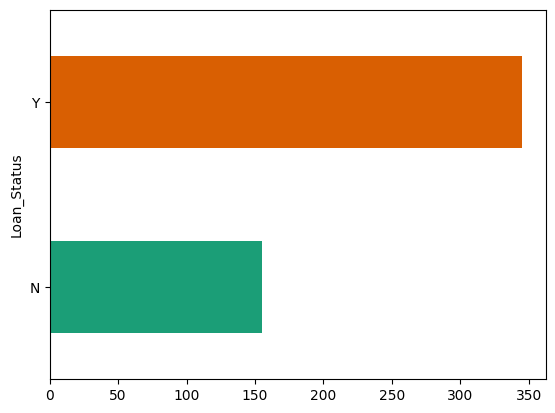

In [59]:
from matplotlib import pyplot as plt
import seaborn as sns
mydata.groupby('Loan_Status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(True)

In [60]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             491 non-null    object 
 1   Married            497 non-null    object 
 2   Dependents         488 non-null    float64
 3   Education          500 non-null    object 
 4   Self_Employed      473 non-null    object 
 5   ApplicantIncome    500 non-null    int64  
 6   CoapplicantIncome  500 non-null    float64
 7   LoanAmount         482 non-null    float64
 8   Credit_History     459 non-null    float64
 9   Property_Area      500 non-null    object 
 10  Loan_Status        500 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 43.1+ KB


<Axes: >

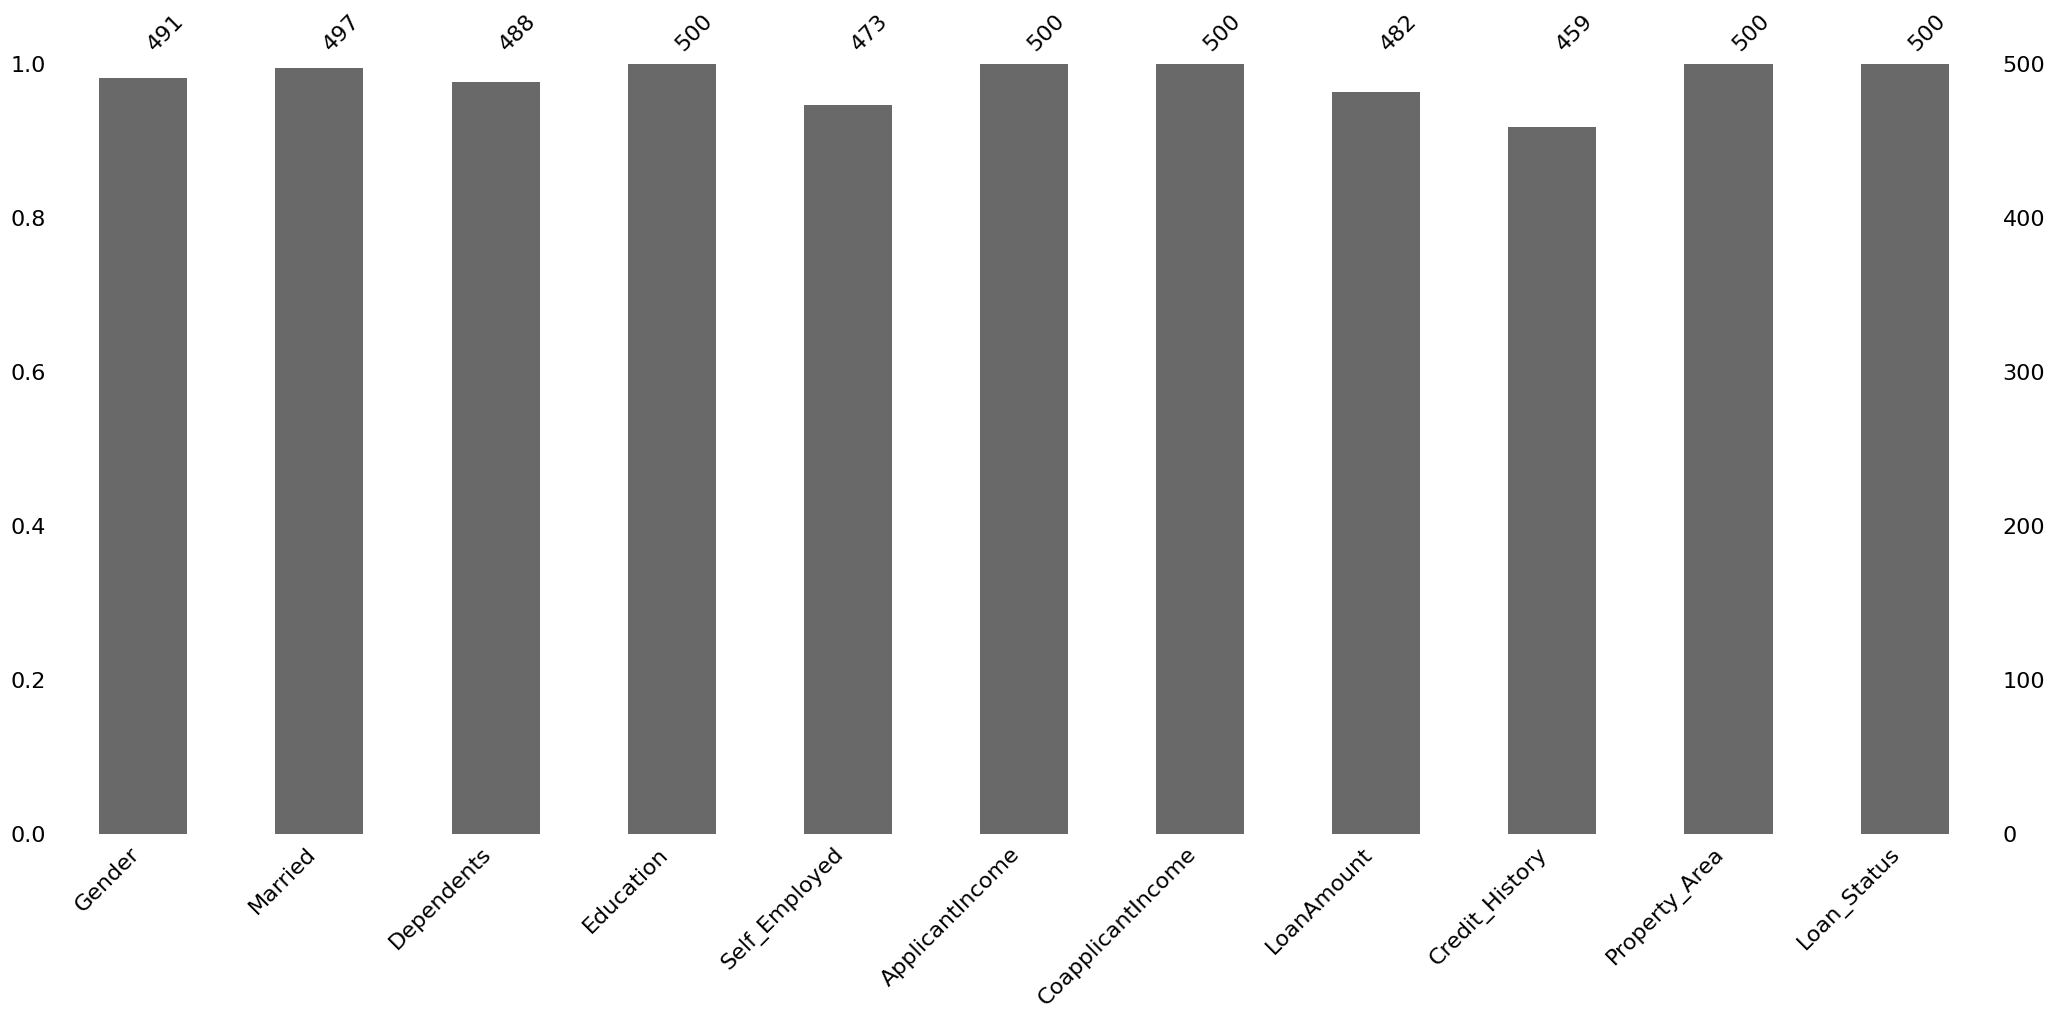

In [62]:
import missingno as msno
msno.bar(mydata)

In [ ]:
mydata.isnull().sum()

Gender                9
Married               3
Dependents           12
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           18
Credit_History       41
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
mydata['LoanAmount'].fillna(mydata['LoanAmount'].median(), inplace=True)
mydata['Credit_History'].fillna(mydata['Credit_History'].median(), inplace=True)
mydata['Dependents'].fillna(mydata['Dependents'].median(), inplace=True)

In [ ]:
mydata['Gender'] = mydata["Gender"].fillna(mydata['Gender'].mode()[0])
mydata['Married'] = mydata["Married"].fillna(mydata['Married'].mode()[0])
mydata['Self_Employed'] = mydata["Self_Employed"].fillna(mydata['Self_Employed'].mode()[0])

In [ ]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             500 non-null    object 
 1   Married            500 non-null    object 
 2   Dependents         500 non-null    float64
 3   Education          500 non-null    object 
 4   Self_Employed      500 non-null    object 
 5   ApplicantIncome    500 non-null    int64  
 6   CoapplicantIncome  500 non-null    float64
 7   LoanAmount         500 non-null    float64
 8   Credit_History     500 non-null    float64
 9   Property_Area      500 non-null    object 
 10  Loan_Status        500 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 43.1+ KB


In [ ]:
all_features = [name for name in mydata.columns if mydata[name].dtype == 'object']
all_features

['Gender',
 'Married',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [ ]:
all_features=[name for name in mydata.columns if mydata[name].dtype =='object']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in list(all_features):
  mydata[i]=le.fit_transform(mydata[i])
for x in all_features:
  print(x," = ",mydata[x].unique())


Gender  =  [1 0]
Married  =  [0 1]
Education  =  [0 1]
Self_Employed  =  [0 1]
Property_Area  =  [2 0 1]
Loan_Status  =  [1 0]


In [ ]:
mydata.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,126.5,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.0,1.0,2,1
5,1,1,2.0,0,1,5417,4196.0,267.0,1.0,2,1
6,1,1,0.0,1,0,2333,1516.0,95.0,1.0,2,1
7,1,1,3.0,0,0,3036,2504.0,158.0,0.0,1,0
8,1,1,2.0,0,0,4006,1526.0,168.0,1.0,2,1
9,1,1,1.0,0,0,12841,10968.0,349.0,1.0,1,0


In [ ]:
from sklearn.feature_selection import chi2
X = mydata.drop('Loan_Status',axis=1)
y = mydata['Loan_Status']
chi_scores = chi2(X,y)
chi_scores

(array([8.89762942e-02, 1.10134139e+00, 6.56464831e-03, 3.40664473e+00,
        2.06553615e-02, 3.21027293e+03, 2.82225271e+01, 1.28273531e+02,
        2.08406234e+01, 2.47779336e-01]),
 array([7.65482642e-01, 2.93971914e-01, 9.35424045e-01, 6.49343509e-02,
        8.85721789e-01, 0.00000000e+00, 1.08138644e-07, 9.77925967e-30,
        4.99129786e-06, 6.18643074e-01]))

In [ ]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = True , inplace = True)
p_values

ApplicantIncome      0.000000e+00
LoanAmount           9.779260e-30
CoapplicantIncome    1.081386e-07
Credit_History       4.991298e-06
Education            6.493435e-02
Married              2.939719e-01
Property_Area        6.186431e-01
Gender               7.654826e-01
Self_Employed        8.857218e-01
Dependents           9.354240e-01
dtype: float64

Text(0.5, 1.0, 'Chi2 test for feature selection')

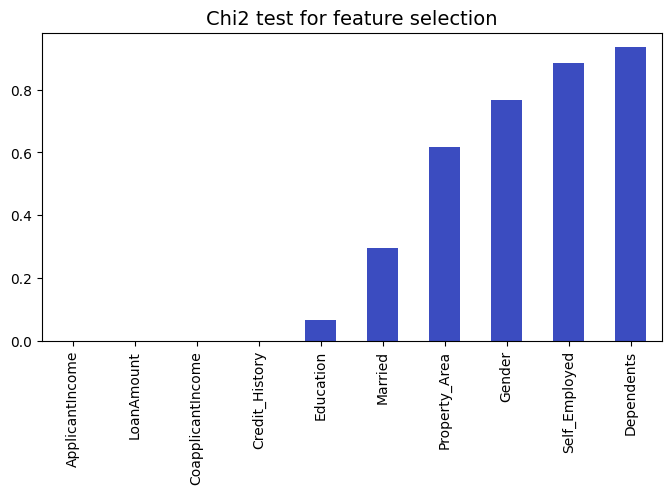

In [ ]:
p_values.plot.bar(figsize = (8,4), cmap="coolwarm")
plt.title('Chi2 test for feature selection', size=14)

In [ ]:
X = mydata.drop('Loan_Status',axis=1)
y = mydata['Loan_Status']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
from sklearn.linear_model import Lasso

best_features = Lasso(alpha=0.01)
best_features.fit(X_train, y_train)
feature_coefficients = pd.Series(best_features.coef_, index=X.columns)
selected_features = feature_coefficients[feature_coefficients != 0].index
print(f"Number of selected features: {len(selected_features)}")
print(f"Selected features : {list(selected_features)}")

Number of selected features: 7
Selected features : ['Married', 'Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History', 'Property_Area']


In [ ]:
X = mydata[['Married', 'Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History', 'Property_Area']]
y = mydata['Loan_Status']

In [ ]:
#oversampling
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_new, y_new = sm.fit_resample(X, y)
print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_new.shape}''')
print('\nBalance of lung cancer and normal (%):')
y_new.value_counts(normalize=True) * 100


Shape of X before SMOTE: (500, 7)
Shape of X after SMOTE: (690, 7)

Balance of lung cancer and normal (%):


Loan_Status
1    50.0
0    50.0
Name: proportion, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
modelRF = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)
modelRF.fit(X_train, y_train)
y_pred = modelRF.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[48 22]
 [ 4 64]]
              precision    recall  f1-score   support

           0       0.92      0.69      0.79        70
           1       0.74      0.94      0.83        68

    accuracy                           0.81       138
   macro avg       0.83      0.81      0.81       138
weighted avg       0.83      0.81      0.81       138

0.8115942028985508


In [ ]:
#SVM classifier
from sklearn import svm

modelSVM = svm.SVC(kernel='linear') # Linear Kernel
modelSVM.fit(X_train, y_train)
y_pred = modelSVM.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[32 38]
 [ 4 64]]
              precision    recall  f1-score   support

           0       0.89      0.46      0.60        70
           1       0.63      0.94      0.75        68

    accuracy                           0.70       138
   macro avg       0.76      0.70      0.68       138
weighted avg       0.76      0.70      0.68       138

0.6956521739130435


In [ ]:
#test for customers
test_loan= pd.read_csv('/content/sample_data/test_loan08.csv')
test_loan.head()



,Married,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area
0,0,0,5849,0,126.5,1,2
1,1,1,4583,1508,128.0,1,0
2,1,0,3000,0,66.0,1,2
3,1,0,2583,2358,120.0,1,2
4,0,0,6000,0,141.0,1,2


In [ ]:
test_predict = modelRF.predict(X=test_loan)
print(test_predict) #ทำนายถูกรายการเดียวคือแถวที่ 2

[1 1 1 1 1]
